In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read very carefully what you should submit in each task

In [3]:
# This tutorial will be about metrics in context of machine learning.
# Metric takes predictions and ground truth (called targets) and output (usually) one number.
# Note that metric does not have to differentiable (example is accuracy)
# Also metric should be understandable without having PhD in math.

## Absolute vs squared error

In [9]:
# Consider following two metrics, with example calculation below

def mean_squared_error(predictions, targets):
    return np.square(predictions - targets).mean()

def mean_absolute_error(predictions, targets):
    return np.abs(predictions - targets).mean()

predictions = np.array([0, 5])
targets = np.array([1, 7])
mean_squared_error(predictions, targets), mean_absolute_error(predictions, targets)

(2.5, 1.5)

Target vs predictions1


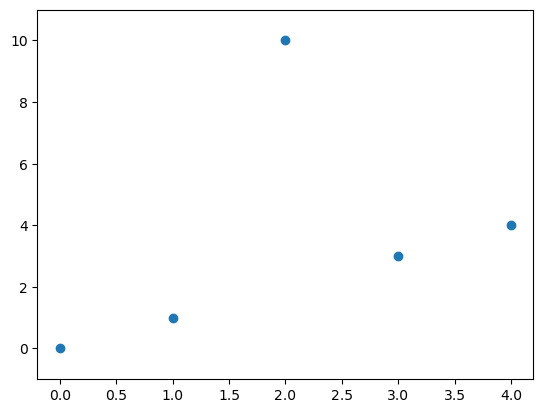

Target vs predictions2


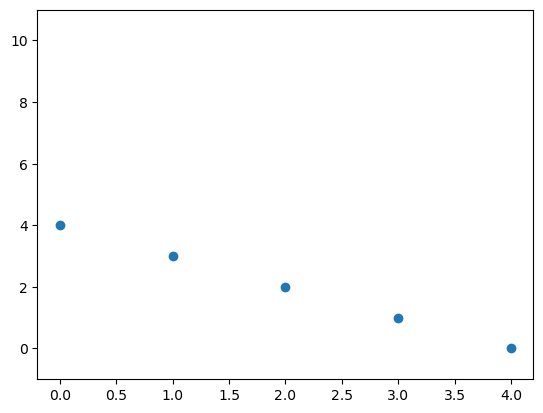

In [18]:
# Which one is better? That depends on the problem. 
# Consider following set of predictions and targets.

targets =      np.array([0,1,2,3,4])
predictions1 = np.array([0,1,10,3,4])
predictions2 = np.array([4,3,2,1,0])

print("Target vs predictions1")
plt.scatter(targets, predictions1)
plt.ylim(-1, 11)
plt.show()

print("Target vs predictions2")
plt.scatter(targets, predictions2)
plt.ylim(-1, 11)
plt.show()

In [20]:
# It seems that first set of prediction is either completelly correct, or off by a lot.
# Maybe it is some outlier in data or wrong data point.
# Second set of prediction has completelly opposite trend and does not look right.
# Let's look at metrics

print("Mean squared error")
print(mean_squared_error(predictions1, targets), mean_squared_error(predictions2, targets))
print("Mean absolute error")
print(mean_absolute_error(predictions1, targets), mean_absolute_error(predictions2, targets))

Mean squared error
12.8 8.0
Mean absolute error
1.6 2.4


In [21]:
# Now we see, that metrics rank our predictions differently. Squared error like the second ones better.
# Absolute error prefers first one.
# This is not completelly good argument that one metric is better than second one, but demonstrates, that
# squared error is sensitive to outliers.

# Also it is better argument than just looking at the values. Any metric can be scaled by a constant, is counted in different units
# so comparing numerical output of two metrics in like comparing volts with meters and basically meaningless.
# But we can still compare ability of metric to rank data in meaninful way.

#### Task 1

In [22]:
# Task 1:
# You are predicting prices of flats.
# Your boss tells you, that no body cares about small errors, but big error are a problem.
# You also manually checked everything and there are no outliers.

# Which metric would you choose between square and absolute error?
# Provide justification and also demonstrate reason for your choice by constructing some small dataset with multiple sets of predictions
# and comparing outputs of metrics.

## Custom metrics - task 2

In [23]:
# Keep in mind that you can also make a metric tailored to your usecase, we will do this in the task below.

In [25]:
# Task 2:
# You are predicting prices of flats.
# Your boss made a new contract, which has following terms:
# - If your prediction has error less (or equal) than 5%, than your company will earn 1000$
# - If your prediction has error more than 5%, your company pays 10000$ fine.

# Construct a custom metric for comparing models in this setting.
# Provide justification and also demonstrate reason for your choice by constructing some small dataset with multiple sets of predictions
# and comparing outputs of metrics. Also demonstrate that your metric is better than selected metric from task 1.

## Metrics for binary classification

In [33]:
# Let's generate some targets

def gen_targets(num_ones, num_zeros):
    return np.array(([1] * num_ones) + ([0]*num_zeros))

targets = gen_targets(5, 45)
targets

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [29]:
# Let's talk about accuracy. It is quite simple measures. Just how many times your model is right.

def accuracy(predictions, targets):
    return (predictions == targets).mean()

accuracy(np.array([1,0,1]), np.array([1,0,0]))

0.6666666666666666

#### Task 3

In [34]:
# Task 3:
# Design a prediction, which gets 90% accuracy on targets two cells above

def predictor():
    # Make this better
    return np.random.uniform(0, 1) < 0.5

accuracy(np.array([predictor() for _ in targets]), targets)

0.5

### More metrics for classification

In [42]:
# Here are couple more metrics, which are common for binary classification, you can also look there definitions on wiki

def precision(predictions, targets):
    predicted_1 = (predictions == 1).sum()
    predicted_1_and_was_correct = ((predictions == 1) & (targets == 1)).sum()

    return predicted_1_and_was_correct / predicted_1

# Also called sensitivity
def recall(predictions, targets):
    target_1 = (targets == 1).sum()
    target_1_and_was_correct = ((predictions == 1) & (targets == 1)).sum()

    return target_1_and_was_correct / target_1

def specificity(predictions, targets):
    target_0 = (targets == 0).sum()
    target_0_and_was_correct = ((predictions == 0) & (targets == 0)).sum()

    return target_0_and_was_correct / target_0

targets = np.array([1,1,1,0,0,0,0,0])
predictions = np.array([1,0,1,0,0,1,1,0])

precision(predictions, targets), recall(predictions, targets), specificity(predictions, targets)

(0.5, 0.6666666666666666, 0.6)

#### Task 4

In [45]:
# Task 4
# For recall and specificity create a simple predictor (like for accuracy), which gets score 1 for given metric.

### Is predictor useful

In [51]:
# Let's generate some data

def gen_data(num_ones, num_zeros):
    targets = gen_targets(num_ones, num_zeros)
    num_mistakes = int(num_zeros / 5)
    predictions = np.array(([1] * num_ones) + ([1] * num_mistakes) + ([0] * (num_zeros - num_mistakes)))
    return targets, predictions

targets, predictions = gen_data(5, 45)
targets, predictions

(array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]))

In [52]:
# Well our prediction have worse accuracy than trivial predictor from task 3.

accuracy(predictions, targets)

0.82

#### Task 5

In [54]:
# Task 5
# Is our predictor really useless? Provide justification for your answer.

### Prevalence sensitivity

In [56]:
# This is data sample taken in general population
targets, predictions = gen_data(5, 95)

# This is data sample taken in hospital
targets2, predictions2 = gen_data(5, 15)

# Note that some metrics are sensitive to prevalence (% of 1 in target) in data

print("Accuracy", accuracy(predictions, targets), accuracy(predictions2, targets2))
print("Precision", precision(predictions, targets), precision(predictions2, targets2))
print("Recall", recall(predictions, targets), recall(predictions2, targets2))
print("Specificity", specificity(predictions, targets), specificity(predictions2, targets2))

Accuracy 0.81 0.85
Precision 0.20833333333333334 0.625
Recall 1.0 1.0
Specificity 0.8 0.8


## ROC AUC

In [57]:
# Receiver operating characterics (https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a metric for classification, which
# sums quality of prediction into one number.
# It needs predictions of probability that output is one as an input and than plots
# FPR (1 - specificity) and TPR (recall) for each treshold.

[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] [0.7717343  0.67526983 0.89084161 0.73517159 0.59593824 0.66107964
 0.1331491  0.25636294 0.54911731 0.45865597 0.1891955  0.42766094
 0.26095833 0.67422178 0.08779158 0.40570954 0.38426681 0.27243572
 0.58688509 0.23238416 0.0330717  0.21811657 0.65229244 0.49834376
 0.14000953 0.54156102 0.54777857 0.00917287 0.41478707 0.54188882
 0.51118076 0.16227702 0.15642615 0.41685633 0.06882331 0.60009523
 0.58757548 0.3531048  0.53860411 0.11003125 0.45766128 0.24956807
 0.56823525 0.30964383 0.41613608 0.16075831 0.03498765 0.26510758
 0.34998718 0.50742934]


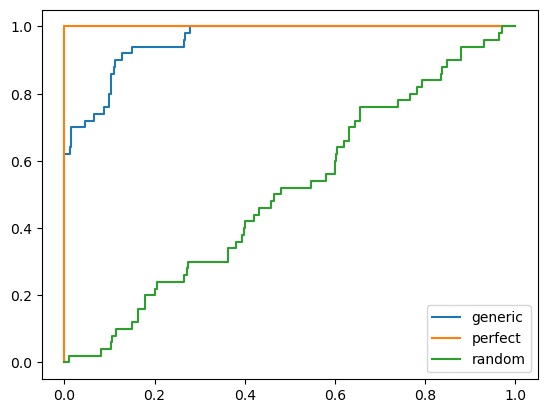

In [66]:
def gen_data_roc(num_ones, num_zeros):
    targets = gen_targets(num_ones, num_zeros)
    predictions = np.concatenate([np.random.uniform(0.5, 1, size=num_ones), np.random.uniform(0, 0.7, size=num_zeros)])
    return targets, predictions

def gen_data_perfect(num_ones, num_zeros):
    targets = gen_targets(num_ones, num_zeros)
    predictions = np.concatenate([np.random.uniform(1, 1, size=num_ones), np.random.uniform(0, 0, size=num_zeros)])
    return targets, predictions

def gen_data_random(num_ones, num_zeros):
    targets = gen_targets(num_ones, num_zeros)
    predictions = np.concatenate([np.random.uniform(0, 1, size=num_ones), np.random.uniform(0, 1, size=num_zeros)])
    return targets, predictions

targets, predictions = gen_data_roc(50, 450)
targets_perf, predictions_perf = gen_data_perfect(50, 450)
targets_rand, predictions_rand = gen_data_random(50, 450)
print(targets[::10], predictions[::10])

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(targets, predictions)
plt.plot(fpr, tpr, label="generic")

fpr, tpr, thresholds = metrics.roc_curve(targets_perf, predictions_perf)
plt.plot(fpr, tpr, label="perfect")

fpr, tpr, thresholds = metrics.roc_curve(targets_rand, predictions_rand)
plt.plot(fpr, tpr, label="random")

plt.legend()

In [68]:
# Notice that better predictor are more leaning towards left and up.
# We can just take area under curve

print("generic", metrics.roc_auc_score(targets, predictions))
print("perfect", metrics.roc_auc_score(targets_perf, predictions_perf))
print("random", metrics.roc_auc_score(targets_rand, predictions_rand))

generic 0.9583111111111111
perfect 1.0
random 0.5077333333333334


#### Task 6

In [70]:
# Task 6:
# Is RoC sensitive to prevalence (number of ones in target)?
# Provide justification.

#### Task 7:

In [ ]:
# Task 7:
# You are running fraud detection algorithm for bank transactions.
# It outputs probability, that given transaction is fraud.
# Bank regulation of our country say that you should catch 95% of fraudalent transactions.
# They do not care about false positives, that's problem of your customer support.
# What metric will you choose to evaluate your fraud detection algorithm? Is roc_auc_score a good metric? If not, give a better metric.